In [26]:
# Data Handling & Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [27]:
# Load the dataset
df = pd.read_csv("AmesHousing (1).csv")
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [29]:
print("\n Missing Values:\n")
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
display(missing)


 Missing Values:



Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Qual        159
Garage Finish      159
Garage Yr Blt      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
Bsmt Qual           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Half Bath       2
Bsmt Full Bath       2
BsmtFin SF 1         1
Garage Cars          1
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Electrical           1
dtype: int64

In [ ]:
# Drop ID columns
df.drop(['Order', 'PID'], axis=1, inplace=True)


df.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence'], axis=1, inplace=True)

categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].fillna('None')

df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

df = df.fillna(df.median(numeric_only=True))

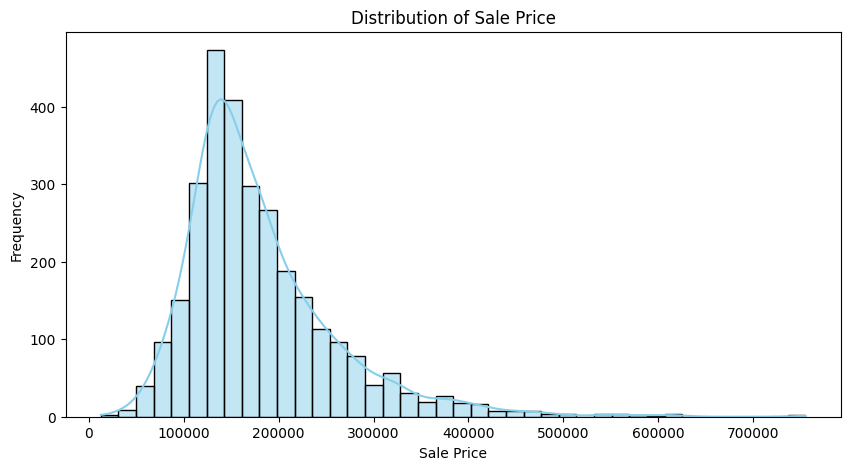

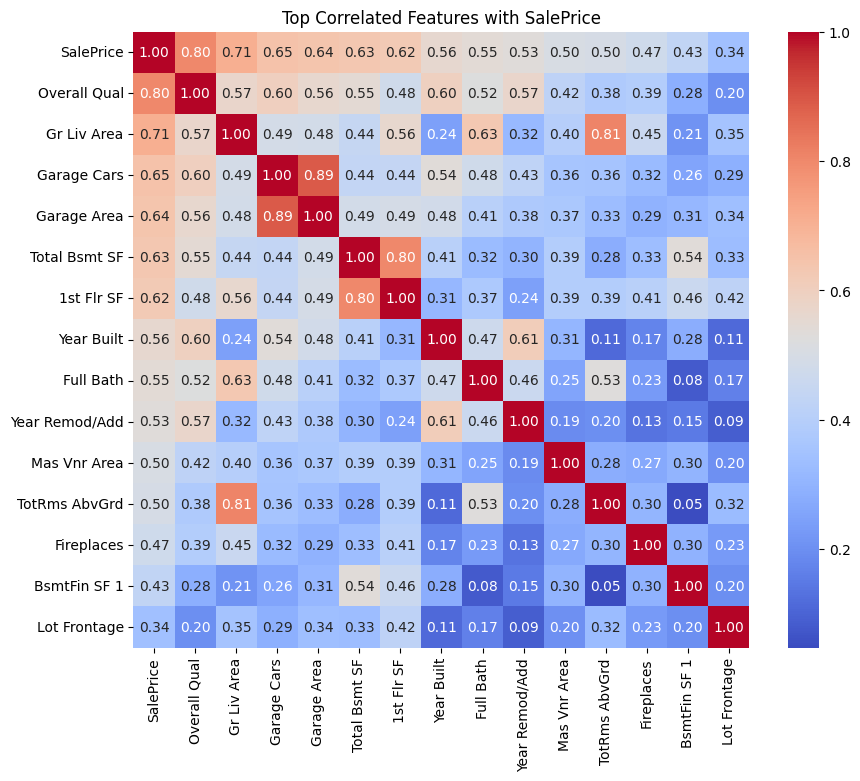

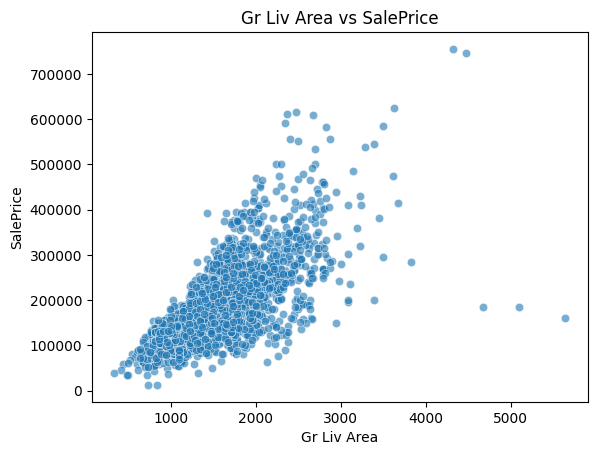

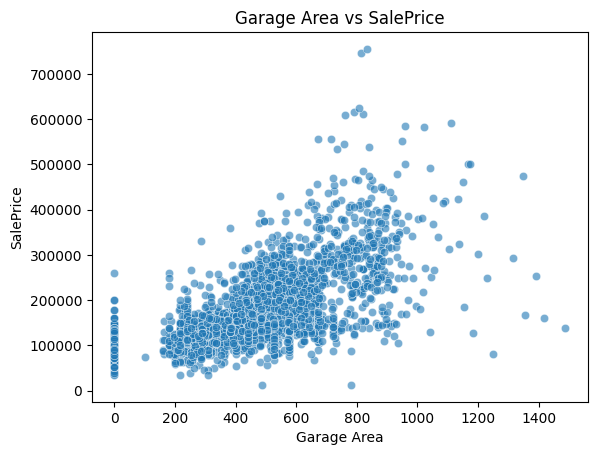

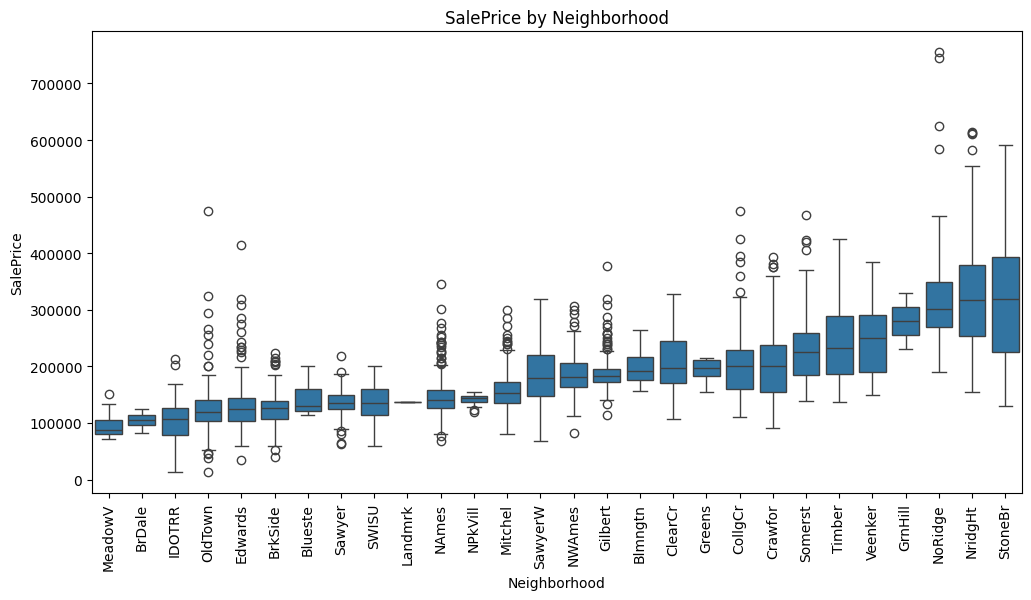

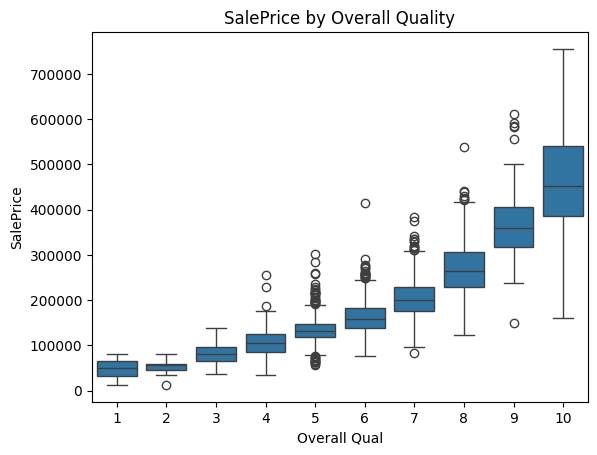

📌 Top 10 Numeric Features Highly Correlated with SalePrice:
1. Overall Qual
2. Gr Liv Area
3. Garage Cars
4. Garage Area
5. Total Bsmt SF
6. 1st Flr SF
7. Year Built
8. Full Bath
9. Year Remod/Add
10. Mas Vnr Area
11. TotRms AbvGrd
12. Fireplaces
13. BsmtFin SF 1
14. Lot Frontage


In [ ]:
# Target Variable Overview

# Distribution plot of SalePrice
plt.figure(figsize=(10, 5))
sns.histplot(df['SalePrice'], kde=True, color='skyblue', bins=40)
plt.title("Distribution of Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()

# Correlation Heatmap

# Correlation matrix with target
corr_matrix = df.corr(numeric_only=True)
top_corr_features = corr_matrix['SalePrice'].sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.loc[top_corr_features.index, top_corr_features.index], 
            annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Top Correlated Features with SalePrice")
plt.show()

# Scatter Plot for Numeric Features


# Example: Gr Liv Area vs SalePrice
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df, alpha=0.6)
plt.title("Gr Liv Area vs SalePrice")
plt.show()

# Example: Garage Area vs SalePrice
sns.scatterplot(x='Garage Area', y='SalePrice', data=df, alpha=0.6)
plt.title("Garage Area vs SalePrice")
plt.show()

# Boxplots for Categorical Features

plt.figure(figsize=(12, 6))
order = df.groupby('Neighborhood')['SalePrice'].median().sort_values().index
sns.boxplot(x='Neighborhood', y='SalePrice', data=df, order=order)
plt.xticks(rotation=90)
plt.title("SalePrice by Neighborhood")
plt.show()

sns.boxplot(x='Overall Qual', y='SalePrice', data=df)
plt.title("SalePrice by Overall Quality")
plt.show()

#  Top 10 Numerical Correlated Features

top_10_corr = top_corr_features.drop("SalePrice").index.tolist()
print("Top 10 Numeric Features Highly Correlated with SalePrice:")
for i, feat in enumerate(top_10_corr, 1):
    print(f"{i}. {feat}")


In [ ]:
# Feature engineering
df['TotalSF'] = df['Total Bsmt SF'] + df['1st Flr SF'] + df['2nd Flr SF']
df['Total_Bathrooms'] = (df['Full Bath'] + df['Bsmt Full Bath'] +
                         0.5 * (df['Half Bath'] + df['Bsmt Half Bath']))
df['Total_Porch'] = (df['Open Porch SF'] + df['Enclosed Porch'] +
                     df['3Ssn Porch'] + df['Screen Porch'])

# Remove extreme outliers
df = df.drop(df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 300000)].index)

df['SalePrice'] = np.log1p(df['SalePrice'])

In [33]:
df.isnull().sum()

MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
                  ..
Sale Condition     0
SalePrice          0
TotalSF            0
Total_Bathrooms    0
Total_Porch        0
Length: 79, dtype: int64

In [ ]:
# Split features and target
y = df['SalePrice']
X = df.drop('SalePrice', axis=1)

# Identify columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include='object').columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ])

# Transform the data
X_processed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42)


In [35]:
# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Predict on test set
y_pred = rf_model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" Random Forest Regressor Performance:")
print(f"RMSE       : {rmse:.4f}")
print(f"MAE        : {mae:.4f}")
print(f"R2 Score   : {r2:.4f}")


 Random Forest Regressor Performance:
RMSE       : 0.1174
MAE        : 0.0816
R2 Score   : 0.9233


In [37]:
# Import XGBoost Regressor
from xgboost import XGBRegressor
# Initialize and train XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [38]:
# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation metrics
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print results
print(" XGBoost Regressor Performance:")
print(f"RMSE       : {rmse_xgb:.4f}")
print(f"MAE        : {mae_xgb:.4f}")
print(f"R2 Score   : {r2_xgb:.4f}")

 XGBoost Regressor Performance:
RMSE       : 0.1086
MAE        : 0.0768
R2 Score   : 0.9343


In [39]:
# Model comparison
results = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost"],
    "RMSE": [rmse, rmse_xgb],
    "MAE": [mae, mae_xgb],
    "R2 Score": [r2, r2_xgb]
})

print(" Model Comparison:")
display(results)

 Model Comparison:


,Model,RMSE,MAE,R2 Score
0,Random Forest,0.117371,0.08164,0.923305
1,XGBoost,0.108641,0.07681,0.934291


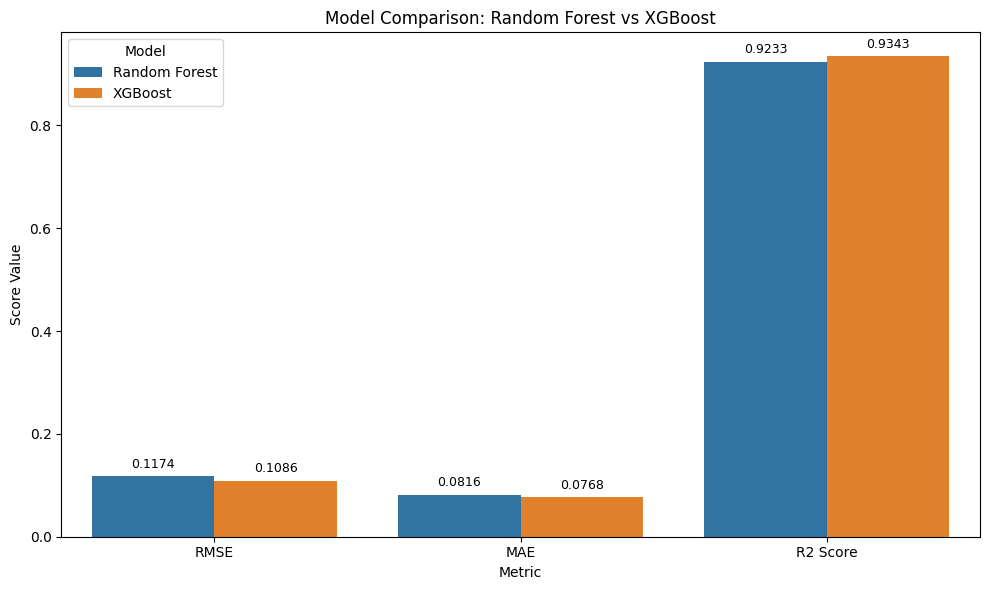

In [ ]:
# Create comparison DataFrame
results = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost"],
    "RMSE": [rmse, rmse_xgb],
    "MAE": [mae, mae_xgb],
    "R2 Score": [r2, r2_xgb]
})

# Melt for plotting
results_melted = results.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Metric', y='Score', hue='Model', data=results_melted)

for p in barplot.patches:
    height = p.get_height()
    if height > 0.001:
        barplot.annotate(f'{height:.4f}',
                         (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='bottom',
                         fontsize=9, color='black', xytext=(0, 4),
                         textcoords='offset points')

plt.title("Model Comparison: Random Forest vs XGBoost")
plt.ylabel("Score Value")
plt.xlabel("Metric")
plt.legend(title='Model')
plt.tight_layout()
plt.show()


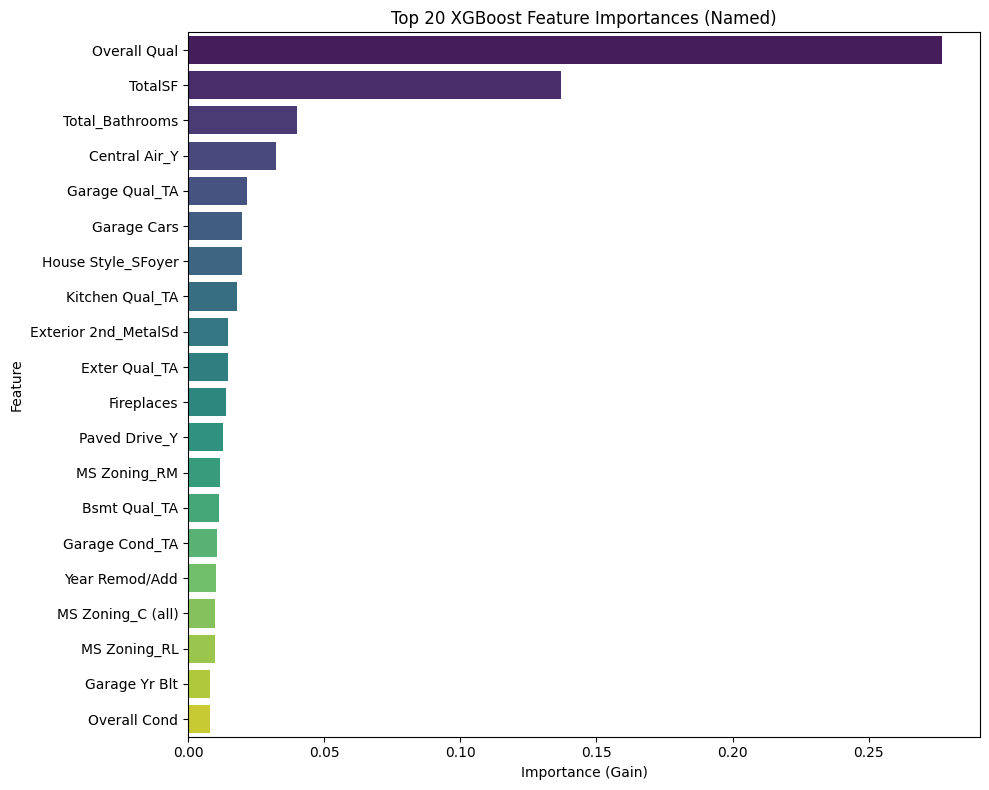

In [41]:
# Recover column names from the preprocessor
num_features = preprocessor.named_transformers_['num'].get_feature_names_out(numeric_cols)

cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

all_feature_names = np.concatenate([num_features, cat_features])

feature_importances = pd.Series(xgb_model.feature_importances_, index=all_feature_names)

top_features = feature_importances.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.title("Top 20 XGBoost Feature Importances (Named)")
plt.xlabel("Importance (Gain)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


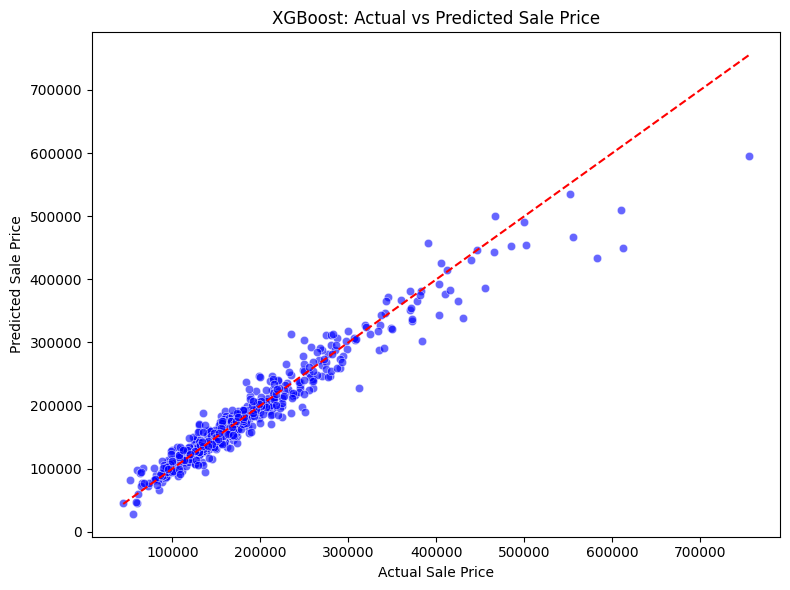

In [ ]:
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_exp, y=y_pred_exp, alpha=0.6, color='blue')

plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], 'r--')

# Labels and title
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("XGBoost: Actual vs Predicted Sale Price")
plt.tight_layout()
plt.show()

In [44]:
# Reverse log transformation for actual and predicted values
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred_xgb)

# Get original test set rows using index
test_indices = y_test.index
original_test = df.loc[test_indices]

# Build enhanced DataFrame
export_df = pd.DataFrame({
    "Actual_SalePrice": y_test_exp,
    "Predicted_SalePrice": y_pred_exp,
    "Neighborhood": original_test["Neighborhood"],
    "Gr_Liv_Area": original_test["Gr Liv Area"],
    "Overall_Qual": original_test["Overall Qual"],
    "Garage_Cars": original_test["Garage Cars"],
    "Total_Bathrooms": original_test["Total_Bathrooms"],
    "Total_Porch": original_test["Total_Porch"],
    "Year_Built": original_test["Year Built"],
    "Roof_Style": original_test["Roof Style"],
    "Bedroom_AbvGr": original_test["Bedroom AbvGr"],
    "Fireplaces": original_test["Fireplaces"]
})

# Export to CSV
export_df.to_csv("xgboost_predictions_export_enhanced.csv", index=False)

print("Enhanced predictions exported to: xgboost_predictions_export_enhanced.csv")

Enhanced predictions exported to: xgboost_predictions_export_enhanced.csv
